In [ ]:
#Do not need to run this line
#!mamba install -qy gmt pygmt

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import xarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib import pyplot as plt
import hvplot.xarray
import hvplot.pandas

In [10]:
from IPython import display
display.set_matplotlib_formats('retina')

In [11]:
data_dir = '/home/jovyan/data/bravoseis_data'

In [12]:
df_allEvents = pd.read_csv(data_dir + '/noaa_hydroacoustic/seasick_output/eqs.csv',
                  sep=',',index_col='time')
df_allEvents['ep_lat']=df_allEvents['ep_lat']*-1
df_allEvents['ep_lon']=df_allEvents['ep_lon']*-1
df_allEvents.head()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2,event,notes,day,month,year
time,,,,,,,,,,,,,,
2019-07-26 02:44:13.300,3.0,654.0,62.344,57.047,0.062,0.212,6.484,187.82,188.1,IQ,in network NE corner,26,7,2019
2019-07-26 03:06:48.200,4.0,2314.0,63.124,58.867,0.012,0.011,0.781,195.79,196.1,IQ,out of network mid basin,26,7,2019
2019-07-26 03:22:14.400,3.0,324.0,62.786,58.856,0.020,0.034,1.039,190.89,191.1,IQ,in network middle,26,7,2019
2019-07-26 03:27:06.800,3.0,654.0,62.450,56.766,0.062,0.283,9.892,190.51,190.7,IQ,out of network,26,7,2019
2019-07-26 03:34:09.900,4.0,4325.0,63.001,58.121,0.015,0.022,1.073,191.83,192.0,IQ,out of network mid basin,26,7,2019


In [13]:
df_allEvents.describe()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,day,month,year
count,5164.000000,5059.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000
mean,131.420023,141540.419252,-7660.242725,-46.716655,-0.974998,0.408850,10.465888,191.629577,15.942874,6.821069,2019.102440
std,9105.307513,204637.032661,58548.961999,34.826621,8.361849,2.101616,20.128944,27.328312,9.703648,2.638261,0.303255
min,3.000000,61.994000,-654321.000000,-79.366000,-63.568000,0.000000,0.000000,0.505000,1.000000,1.000000,2019.000000
25%,4.000000,2134.000000,-62.960000,-59.015250,0.025000,0.030000,1.238000,189.920000,7.000000,6.000000,2019.000000
50%,5.000000,23456.000000,-62.634500,-58.064000,0.053000,0.052000,3.007000,194.860000,15.000000,7.000000,2019.000000
75%,6.000000,213456.000000,-62.258000,-57.109000,0.143000,0.181000,8.940250,199.762500,25.000000,8.000000,2019.000000
max,654321.000000,654321.000000,68.975000,77.488000,68.835000,61.273000,207.310000,230.460000,31.000000,12.000000,2020.000000


In [14]:
df_eqs = df_allEvents.loc[df_allEvents['event'] == 'EQ'].copy()# .copy creates its own dataframe 
cond1 = df_eqs["ep_lat"] < -60    
cond2 = df_eqs["ep_lat"] > -65
cond3 = df_eqs["ep_lon"] > -62
cond4 = df_eqs["ep_lon"] < -52

df_eqs = df_eqs[cond1 & cond2 & cond3 & cond4].copy()
df_eqs.head()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,mdb2,event,notes,day,month,year
time,,,,,,,,,,,,,,
2019-03-31 02:55:05.300,3.0,653.0,-62.027,-56.719,0.424,1.108,50.174,206.26,206.2,EQ,NaN,31,3,2019
2019-03-31 02:59:43.800,4.0,6542.0,-62.253,-57.150,0.059,0.035,0.794,199.98,200.3,EQ,NaN,31,3,2019
2019-03-31 06:58:25.400,3.0,236.0,-62.615,-59.769,0.041,0.192,5.341,207.05,207.3,EQ,NaN,31,3,2019
2019-03-31 07:53:36.800,3.0,321.0,-62.558,-59.524,0.025,0.043,1.456,205.77,206.0,EQ,NaN,31,3,2019
2019-03-31 17:11:58.500,4.0,3214.0,-62.506,-59.360,0.020,0.027,1.074,207.27,207.4,EQ,NaN,31,3,2019


In [15]:
df_eqs.describe()

,h_count,h_id,ep_lat,ep_lon,er_lat,er_lon,er_time,mdb,day,month,year
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,4.726776,192556.658470,-62.395303,-57.714404,0.246861,0.548757,15.198773,200.132514,13.934426,5.379781,2019.322404
std,1.189771,256267.638588,0.467927,1.586195,0.768683,1.853585,26.010374,7.812478,9.134674,3.444356,0.468037
min,3.000000,123.000000,-63.855000,-61.628000,0.000000,0.000000,0.015000,178.910000,1.000000,1.000000,2019.000000
25%,4.000000,3214.250000,-62.684500,-58.662000,0.028000,0.034000,1.201750,194.950000,5.000000,1.000000,2019.000000
50%,5.000000,45632.000000,-62.319500,-57.531000,0.067000,0.078000,3.553500,199.685000,12.000000,6.000000,2019.000000
75%,6.000000,345261.000000,-62.174000,-57.079500,0.189500,0.298000,13.852750,204.740000,22.000000,8.000000,2020.000000
max,6.000000,654321.000000,-60.033000,-52.338000,8.947000,20.957000,99.999000,225.310000,31.000000,12.000000,2020.000000


In [16]:
col_names = ['lon','lat','depth'] 
col_names2 = ['lat','lon','depth'] 

In [17]:
df_bathy = pd.read_csv(data_dir + '/Orca10m.txt',
                  sep=' ', header=0, names=col_names2,
                  dtype = {'lon': np.float64,'lat': np.float64, 'depth': np.float64})

df_bathy.tail()

,lat,lon,depth
9193443,-62.306936,-58.289368,-1451.067
9193444,-62.306938,-58.289175,-1452.510
9193445,-62.306940,-58.288982,-1452.510
9193446,-62.306843,-58.289750,-1450.408
9193447,-62.306845,-58.289557,-1450.408


In [18]:
df_bathy.scatter

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [ ]:
!head /home/jovyan/repos/bravoseis/T_00.xyg

In [ ]:
df_test = pd.read_csv('/home/jovyan/repos/bravoseis/T_00.xyg',
                  sep='\t', header=0, names=col_names,
                  dtype = {'lon': np.float64,'lat': np.float64, 'depth': np.float64})
df_test.tail()

In [ ]:
import pygmt
pygmt.show_versions()

In [ ]:
pygmt.surface(data=None, x=None, y=None, z=None, *, spacing=None, region=None, outgrid=None, verbose=None, aspatial=None, binary=None, nodata=None, find=None, coltypes=None, header=None, incols=None, registration=None, wrap=None, **kwargs)

In [ ]:
fig.coast(
    # Set the x-range from 10E to 20E and the y-range to 35N to 45N
    region=[-62, -52, -65, -60],
    projection="M12c",
    land="lightgray",
    water="white",
    borders="1/0.5p",
    shorelines="1/0.5p",
    frame="ag",
)
fig.show()

In [ ]:
gmt surface hawaii_5x5.xyg -R198/208/18/25 -I5m -Ghawaii_grd.nc -T0.25 -C0.1 -Vl

In [ ]:
gmt blockmean @ship_15.txt -R245/255/20/30 -I5m > ship_5x5.txt

In [ ]:
pygmt.blockmean(x=df_bathy.lon.values, y=df_bathy.lat.values, z=df_bathy.depth.values,
              spacing = '5m', region=[182, 185, 0, 3], outfile='orcaBlockMean.txt',
              verbose=None, aspatial=None, binary=None,
              nodata=None, find=None, coltypes=None,
              header= 1, incols=None, registration=None, wrap=None)

In [ ]:
pygmt.blockmean(x=df_test.lon.values, y=df_test.lat.values, z=df_test.depth.values,
              spacing = '5m', region=[182, 185, 0, 3], outfile='orcaBlockMean.txt',
              verbose=None, aspatial=None, binary=None,
              nodata=None, find=None, coltypes=None,
              header= 1, incols=None, registration=None, wrap=None)

In [ ]:
df_blockMean = pd.read_csv('orcaBlockMean.txt',
                  sep=' ', header=0, names=col_names,
                  dtype = {'lon': np.float64,'lat': np.float64, 'depth': np.float64})


df_blockMean.tail()

In [ ]:
plot = pygmt.surface(x=df_bathy.lon.values, y=df_bathy.lat.values, z=df_bathy.depth.values,
              spacing = '10m', region=[-62, -52, -65, -60], outgrid='orca.grd',
              verbose=None, aspatial=None, binary=None,
              nodata=None, find=None, coltypes=None,
              header= 1, incols=None, registration=None, wrap=None)

In [ ]:
df_test.head()

In [ ]:
pygmt.surface(x=df_test.lon.values, y=df_test.lat.values, z=df_test.depth.values,
              spacing = '10m', region=[182, 185, 0, 3], outgrid='orca_grd.nc',
              verbose=None, aspatial=None, binary=None,
              nodata=None, find=None, coltypes=None,
              header= 1, incols=None, registration=None, wrap=None)

In [ ]:
pygmt.surface(data = '/home/jovyan/repos/bravoseis/T_00.xyg',
              spacing = '10m', region=[182, 185, 0, 3], outgrid='orca_grd.nc',
              verbose=None, aspatial=None, binary=None,
              nodata=None, find=None, coltypes=None,
              header= 1, incols=None, registration=None, wrap=None)

In [ ]:
df_bathy.plot.scatter(x='lon', y='lat', c = 'depth')

In [ ]:
# import scipy
# from  scipy.interpolate import griddata
# import matplotlib.pyplot as plt

# depth = df_bathy.depth.values
# lat = df_bathy.lat.values
# lon = df_bathy.lon.values

# numrows = 100
# numcols = 100

# xi = np.linspace(lon.min(), lon.max(), numrows)
# yi = np.linspace(lat.min(), lat.max(), numcols)
# xi, yi = np.meshgrid(xi, yi)
# points = np.vstack((lon,lat)).T 
# wanted = (xi, yi)

# grid = scipy.interpolate.griddata(points, 
#                                   depth, 
#                                   wanted, 
#                                   method='linear', 
#                                   fill_value=np.nan)

# plt.imshow(grid)

In [ ]:
da_bathy=xr.DataArray(data= df_bathy.depth.values,
             coords= {'lon':df_bathy.lon.values,
                      'lat':df_bathy.lat.values},
             dims = {'lon':df_bathy.lon.values, 'lat':df_bathy.lat.values})

In [ ]:
da_bathy.name= 'depth'

In [ ]:
da_bathy.to_dataset()

In [ ]:
da_bathy.plot()

In [ ]:
ax = plt.axes(projection = ccrs.Robinson(central_longitude = -58.5))
ax.plot(df_bathy.lon, df_bathy.lat, transform = ccrs.Geodetic())
ax.gridlines()

In [ ]:
ds_bathy = df_bathy.to_xarray(coords = {'lon':[df_bathy.lon], 'lat': [df_bathy.lat]})
ds_bathy

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 4))
ds_bathy.lat.plot(ax=ax1)
ds_bathy.lon.plot(ax=ax2)

In [ ]:
df_eqs['temp'] = (df_eqs['mdb']/ df_eqs['mdb'].max())
df_eqs['normalized'] = (df_eqs['temp']-df_eqs['temp'].min())
#df_eqs['eq_time']= (df_eqs['source_time']-df_eqs['source_time'].min())/(60*60*24)
df_eqs.head()

In [ ]:
df_eqs.hist()

### Mapping eq data
Let's make some maps just because we can.

In [ ]:
url = 'http://geoport.whoi.edu/thredds/dodsC/bathy/srtm30plus_v6'

In [ ]:
ds = xr.open_dataset(url)

In [ ]:
ds

In [ ]:
ds_bran = ds.sel(lon=slice(-61 ,-56.5),lat = slice(-62, -63.5))

In [ ]:
df_eqs.head()

In [ ]:
df_eqs.time.hist()

In [ ]:
import colorcet as cc
from colorcet.plotting import swatch
mag_cmap = cc.CET_L4[::-1]
swatch("CET_L4_r", mag_cmap)

In [ ]:
pd.DatetimeIndex(df_eqs.index).to_julian_date()

In [ ]:
df_eqs['time']= pd.DatetimeIndex(df_eqs.index).to_julian_date()- 2458573.6215891205

In [ ]:
df_eqs.tail()

In [ ]:
df_eqs.time.hist(bins=12)

In [ ]:
df_eqs.mdb2

In [ ]:
import rioxarray
import riox

In [ ]:
ds = rioxarray.open_rasterio(data_dir + '/merged_DEM.tif')

In [ ]:
import rasterio
import rasterio.plot
tiff = rasterio.open(data_dir + '/merged_DEM.tif')
rasterio.plot.show(tiff, title = "Orca Volcano")

In [ ]:
!gdalinfo {data_dir + '/Orca10m.tiff'}

In [ ]:
bathy_ds = xr.load_dataset(data_dir + '/Zmb15_grid_window.grd')
bathy_ds = bathy_ds.rename({'z': 'depth'})
bathy_ds = bathy_ds.rename({'x': 'lon'})
bathy_ds = bathy_ds.rename({'y': 'lat'})
bathy_ds

In [ ]:
ax = plt.axes(projection = ccrs.Robinson(central_longitude =-58))
sc = ax.scatter(df_eqs.ep_lon,
                df_eqs.ep_lat,
                transform= ccrs.PlateCarree(),
               s=np.square(df_eqs.normalized)*1000,
               c=df_eqs.time)
cbar = plt.colorbar(sc, label = 'Date')
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format = '%m/%d'))
ax.gridlines();

In [ ]:
eq_plot1 = ds_bran['topo'].hvplot(x='lon', y='lat', geo=True, rasterize=True) 

In [ ]:
import colorcet as cc
from colorcet.plotting import swatch
mag_cmap = cc.CET_L4[::-1]
swatch("CET_L4_r", mag_cmap)

In [ ]:
eq_plot2 = df_eqs.hvplot.points(x='ep_lon', y='ep_lat', geo=True, hover_cols =['mdb2', 'normalized'],
                              color = "source_time", cmap = 'colorwheel', s= "normalized")

In [ ]:
eq_plot3 = df_eqs.hvplot.points(x='ep_lon', y='ep_lat', geo=True, hover_cols =['mdb2', 'normalized'],
                              color = "mdb2", cmap = mag_cmap, s= 'normalized',tiles ='CartoLight')

In [ ]:
df_eqs.hvplot.points(x='ep_lon', y='ep_lat', geo=True, hover_cols =['mdb2', 'normalized'],
                              color = "source_time", cmap = 'viridis', s= 'normalized',tiles ='CartoLight')

In [ ]:
import holoviews as hv
hv.extension('bokeh')
layout = hv.Layout(eq_plot1*eq_plot2 + eq_plot3).cols(1)
layout

In [ ]:
import cartopy.crs as ccrs  

In [ ]:
ds_bran['topo'].hvplot(x='lon', y='lat', geo=True, rasterize=True, projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))* eqs_sub.hvplot.points(x='ep_lon',
                y='ep_lat', geo=True, rasterize = True,
                  color='index', cmap='colorwheel',
                  projection=ccrs.UTM(21, southern_hemisphere=True, globe=None))  


In [ ]:
from geoviews.tile_sources import EsriImagery
topts = dict(width=700, height=600, bgcolor='black', xaxis=None, yaxis=None, show_grid=False)
tiles = EsriImagery.clone(ccrs=ccrs.GOOGLE_MERCATOR)

# Scratch 2 

In [ ]:
import urllib2

In [ ]:
import datetime as dt
from io import BytesIO

import numpy as np
import pandas as pd
import holoviews as hv

from matplotlib.image import imread
from mpl_toolkits.basemap import Basemap

hv.notebook_extension('bokeh', width=90)

In [ ]:
bathy_ds = xr.load_dataset('Orca10m_grd.nc')

bathy_ds

In [ ]:
bathy_ds.z.plot()

In [4]:
temp_ds = xr.load_dataset(data_dir + '/temp.nc')

In [5]:
temp_ds

<xarray.Dataset>
Dimensions:  (x: 13335, y: 13341)
Coordinates:
  * x        (x) float64 -3.333e+06 -3.333e+06 ... 3.333e+06 3.334e+06
  * y        (y) float64 -3.337e+06 -3.336e+06 ... 3.333e+06 3.333e+06
Data variables:
    z        (y, x) float32 inf inf inf inf inf inf ... inf inf inf inf inf inf
Attributes:
    Conventions:  CF-1.7
    title:        Produced by grdconvert
    history:      grdconvert ibcso_v1_bed.grd -Gtemp.nc\n\t(old cmd) Created ...
    description:  Polar Stereographic projection with truescale at 71 degree S
    GMT_version:  6.3.0 [64-bit]

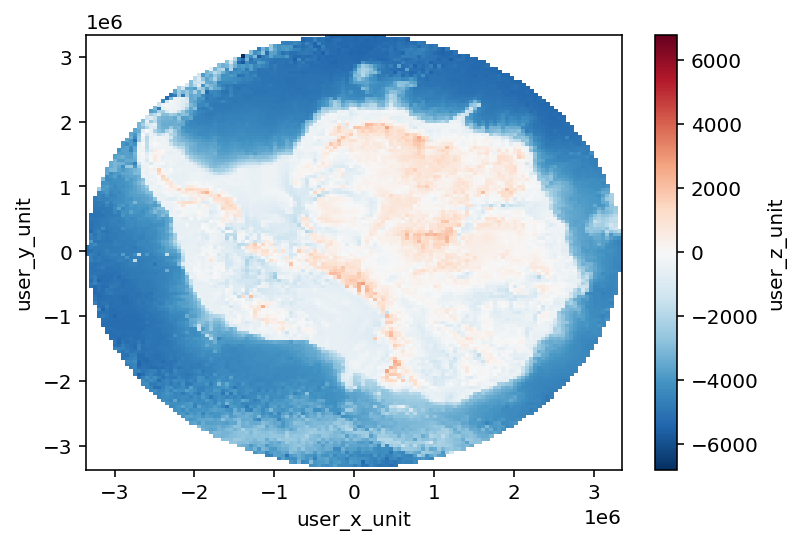

In [8]:
temp_ds.z[::100,::100].plot()